## The Office!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>

## 1. Import Data
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code></p>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 7]

#Reading officce_series.csv dataset and parse the date
office_df = pd.read_csv('datasets/the_office_series.csv')
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/the_office_series.csv</b></div>
<ul>
    <li><b>Unnamed: 0:</b> Unnamed index values</li>
    <li><b>Season:</b> Season in which the episode appeared.</li>
    <li><b>EpisodeTitle:</b> Title of the episode.</li>
    <li><b>About:</b> Description of the episode.</li>
    <li><b>Ratings:</b> Average IMDB rating.</li>
    <li><b>Votes:</b> Number of votes.</li>
    <li><b>Viewership:</b> Number of US viewers in millions.</li>
    <li><b>Duration:</b> Duration in number of minutes.</li>
    <li><b>Date:</b> Airdate.</li>
    <li><b>GuestStars:</b> Guest stars in the episode (if any).</li>
    <li><b>Director:</b> Director of the episode.</li>
    <li><b>Writers:</b> Writers of the episode.</li>
</ul>
    </div>

## 2. Data Preprocessing and Modify the dataframe

<p style= 'font-size:16px;'>The column <b style='font-size:18px'>Date</b> is <b>object</b> datatype. It should be <b>date</b> type, so we change type of  <b style='font-size:18px'>Date</b> column to 'date' datatype.</p>

In [2]:
office_df['Date'] = pd.to_datetime(office_df['Date'])

<p style='font-size:16px'>One column is missing called <b style='font-size:18px'>EpisodeNumbers</b> and the column index one is 'Unnamed: 0'.So we change the column index one from 'Unnamed: 0' to 'EpisodeNumbers' </p>

In [3]:
office_df = office_df.rename(columns = {'Unnamed: 0': 'EpisodeNumbers'})

### Add New Columns

As we want to investigate difference between the episodes with Guest Stars and without Guest Stars, we add a new column <b>HasGuestStars</b> by checking <b>GuestStars</b> name column. If there has a gueststar, we add 'True', otherwise, we add 'False'. 

In [4]:
office_df['HasGuestStars'] = office_df['GuestStars'].notna()

When we check the <b>Ratings</b> column, it contains the rating scores of each episodes which are range form 0 to 10.

In [5]:
print(office_df['Ratings'].describe())

count    188.000000
mean       8.237234
std        0.589930
min        6.600000
25%        7.800000
50%        8.200000
75%        8.600000
max        9.800000
Name: Ratings, dtype: float64


The rating values of each episodes in The Office Series are range from 6.6 to 9.8. We want to check the data easily, so we change rating values to normalized rating values which is range from 0 to 1 and add them into <b>ScaledRating</b> column.

In [6]:
#create normalize the rating Function
def normalizeFunc(col):
    minVal = min(col)
    maxVal = max(col)
    return [*map(lambda x: (x - minVal)/(maxVal - minVal), col)]

#call normaize Function
office_df['ScaledRating'] = normalizeFunc(office_df['Ratings'])

office_df['ScaledRating'].describe()

count    188.000000
mean       0.511636
std        0.184353
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        1.000000
Name: ScaledRating, dtype: float64

## 3. Exploratory data analysis

### Analysis Rating & Viewerships in Appearance of Guest Stars

We want to analysis Rating and Viwerships between Guest Stars appearance and non Guest Stars appearance of entire series. So, we need to  inversigate and visualize data by choosing correct chart with colors, size, shape, etc.

We separate the <b>Rating</b> values to four categoreis with colors.
<ul>
    <li>If ScaleRating is less than 0.25, the color will be <b style='color:red'>RED</b>.</li>
    <li>If ScaleRating is between 0.25 and 0.5, the color will be <b style='color:orange'>ORANGE</b>.</li>
    <li>If ScaleRating is between 0.5 and 0.75, the color will be <b style='color:lightgreen'>LIGHTGREEN</b>.</li>
    <li>If ScaleRating is above 0.75, the color will be <b style='color:darkgreen'>DARKGREEN</b>.</li>
</ul>

In [7]:
cols = []

for ind, row in office_df.iterrows():
    if row['ScaledRating'] < 0.25:
        cols.append('red')
    elif row['ScaledRating'] < 0.5:
        cols.append('orange')
    elif row['ScaledRating'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

If the episode contain Guest Stars, we make the appearance size to 250, and otherwise, the size will be 25.

In [8]:
sizes = []

for ind, row in office_df.iterrows():
    if row['HasGuestStars'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

Let's create two new column called <b>colors</b> and <b>sizes</b> in office_df and add columns and sizes values

In [9]:
office_df['colors'] = cols
office_df['sizes'] = sizes

And then we divide two DataFrames from <b>office_df</b> called <b>non_guest_df</b> which contains without Gust Stars Episodes and <b>guest_df</b> which is Guest Star apperance Episodes

In [10]:
non_guest_df = office_df[office_df['HasGuestStars'] == False]
guest_df = office_df[office_df['HasGuestStars'] == True]

<p style='font size: 18px;'> Let's Invesigate the Office Series In appearance of guest stars</p>

We visualize two data of non guest star and guest star in one <b>Scatter</b> plot.
The horizontal line is 'Episode Numbers' and vertical line is 'Viewership' in Millions of each episode.
Non Guest Star data is 'circle' shape and Guest Star data is 'star' shape. 

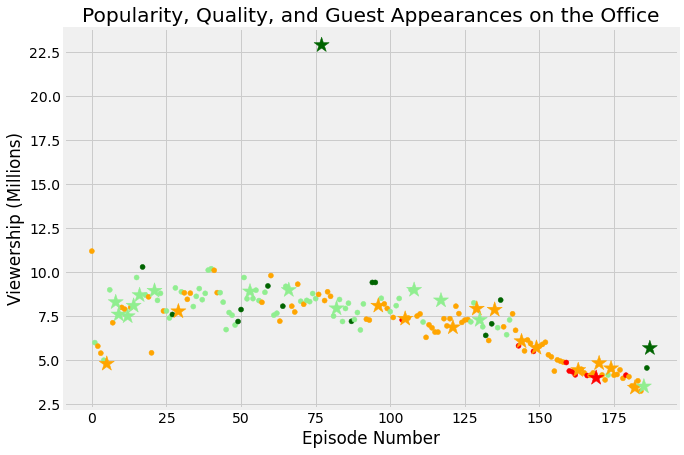

In [11]:
fig = plt.figure()
#Style of Plot
plt.style.use('fivethirtyeight')

plt.scatter(x = non_guest_df['EpisodeNumbers'],
            y = non_guest_df['Viewership'],
            c = non_guest_df['colors'],
            s = non_guest_df['sizes']
           )

plt.scatter(x = guest_df['EpisodeNumbers'],
            y = guest_df['Viewership'],
            c = guest_df['colors'],
            s = guest_df['sizes'],
            marker = '*'
           )

plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel("Viewership (Millions)")
plt.show()

In above 'scatter' plot, the viewerships is average between 7.5 millions and 10 millions before episode number 125. And then the viewers are almostly decrease. The rating are worst between episode number 150 and 175. The appearence of Guest stars in each episodes is not difinately shown in scatter, so we need to farther invesigating.
<br><br>
Ther is one outliner in scattter plot. So, we check this episode which contains two Guest Stars, rating is in highest category (9.7) and the viewer is above 22.97 millions.

In [12]:
for lab, row in office_df[office_df['Viewership'] == office_df['Viewership'].max()].iterrows():
    print(row)

EpisodeNumbers                                                   77
Season                                                            5
EpisodeTitle                                          Stress Relief
About             Dwight's too-realistic fire alarm gives Stanle...
Ratings                                                         9.7
Votes                                                          8170
Viewership                                                    22.91
Duration                                                         60
Date                                            2009-02-01 00:00:00
GuestStars                Cloris Leachman, Jack Black, Jessica Alba
Director                                              Jeffrey Blitz
Writers                                            Paul Lieberstein
HasGuestStars                                                  True
ScaledRating                                                0.96875
colors                                          

### Numbers of Episodes in each Seasons with Appeareance of Guest Stars

We analysis number of episode in each season with bar char.<br>
Horizontal line is "Season Number" and Vertical line is episode count in each season. <br>
Non Guest Star Episodes are in <b style='color:lightgreen'>LightGreen</b> color and Guest Stars Episodes are in <b style='color:blue'>Blue</b> color.

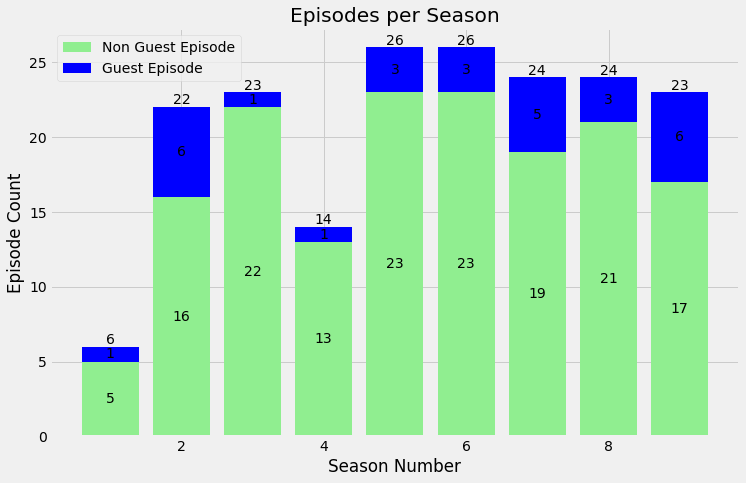

In [16]:
non_guest_episode = non_guest_df['Season'].value_counts(sort = False)
guest_episode = guest_df['Season'].value_counts(sort = False)

fig, ax = plt.subplots()
n_guest_bar = ax.bar(non_guest_episode.index, non_guest_episode, color ='lightgreen', label = 'Non Guest Episode')
guest_bar = ax.bar(guest_episode.index, guest_episode, color ='blue', bottom = non_guest_episode,label = 'Guest Episode')
ax.set_xlabel('Season Number')
ax.set_ylabel('Episode Count')
ax.set_title('Episodes per Season')
ax.bar_label(n_guest_bar, label_type = 'center')
ax.bar_label(guest_bar, label_type='center')
ax.bar_label(guest_bar)
ax.legend() 
plt.show()



From 'Episode per Season' bar chart,<br>
- Season 1 has miniumu number of Episodes (6 Episode) and season 5 & 6 have maximun Episodes (26 Episodes).<br>
- Appearance of Guest Stars Episode is less than non Guest Stars in every seasons 
- Guest Star participate episode is minimun in season 1, 2, 4 and only main characters acting episodes is maximun in season 2, 6

### Top rating and Top Viewership Episodes

We analysis the top 10 episodes based on rating and viewership by visualizing two bar charts.<br>
We pull out top rating episodes by sorting <b>Rating</b> column. If the rating values are equal, we order by <b>viewership</b>. <br>
We pull out top viwerships episodes by sorting <b>viewership</b> column. If the Viewership values are equal, we order by <b>Rating</b>. <br><br>

Left side is <b>Top 10 Rating Episode</b> Barchart and Right side is <b>Top 10 Viewership Episode</b> Barchart.<br>
Guest Stars Appearance Episode is in <b style='color:blue'>BLUE</b> and Non Guest Star Episodes <b style='color:lightgreen'>LIGHTGREEN</b>

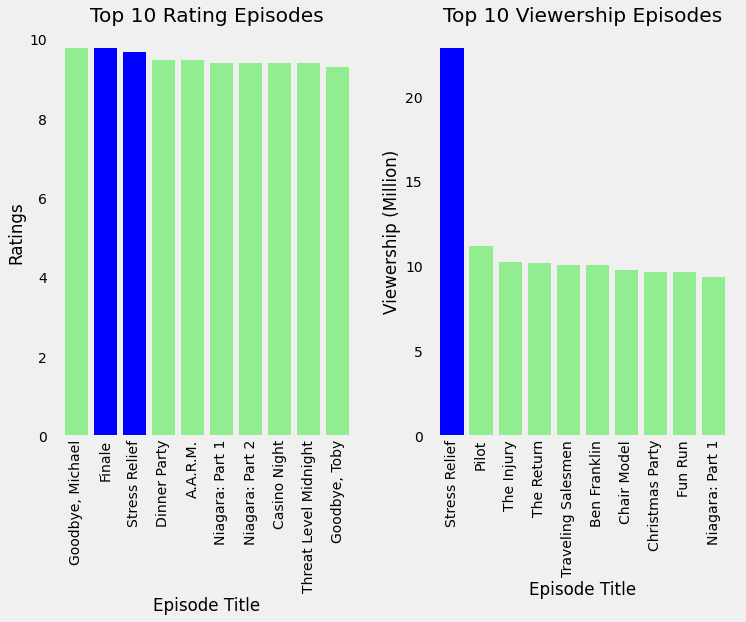

In [66]:
#chreate GuestColor Function this returns Blue if guest star appearance otherwise Light green 
def GuestColor(hasGuest, color1 = 'blue', color2 = 'lightgreen'):
    if hasGuest:
        return color1
    else:
        return color2

top_rating_episodes = office_df.sort_values(['Ratings', 'Viewership'], ascending = [False, False])[['Ratings','EpisodeTitle','HasGuestStars']].iloc[:10]
top_viewership_episodes = office_df.sort_values(['Viewership', 'Ratings'], ascending = [False, False])[['Viewership','EpisodeTitle', 'HasGuestStars']].iloc[:10]

top_rating_color = [GuestColor(guest) for guest in top_rating_episodes['HasGuestStars']]
top_viewership_color = [GuestColor(guest) for guest in top_viewership_episodes['HasGuestStars']]


fix, ax = plt.subplots(1,2)

ax[0].bar(top_rating_episodes['EpisodeTitle'], top_rating_episodes['Ratings'], color = top_rating_color )
ax[0].set_xticks(np.arange(10))
ax[0].set_xticklabels(top_rating_episodes['EpisodeTitle'], rotation = 90)
ax[0].set_xlabel('Episode Title')
ax[0].set_ylabel('Ratings')
ax[0].set_title("Top 10 Rating Episodes")
ax[0].grid(False)

ax[1].bar(top_viewership_episodes['EpisodeTitle'], top_viewership_episodes['Viewership'], color = top_viewership_color)
ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(top_viewership_episodes['EpisodeTitle'], rotation = 90)
ax[1].set_xlabel('Episode Title')
ax[1].set_ylabel('Viewership (Million)')
ax[1].set_title("Top 10 Viewership Episodes")
ax[1].grid(False)

plt.show()

### Relatinship Between 'Rating' and 'Viewership'

We analysis realtionship between 'Rating' and 'Vewership' of each episode.<br>
Horizontal axis is 'Rating' and Vertical axis is 'Viewership (mills)'. <br>
Guest Stars Appearance Episode is in <b style='color:red'>RED</b> and Non Guest Star Episodes <b style='color:blue'>BLUE</b>

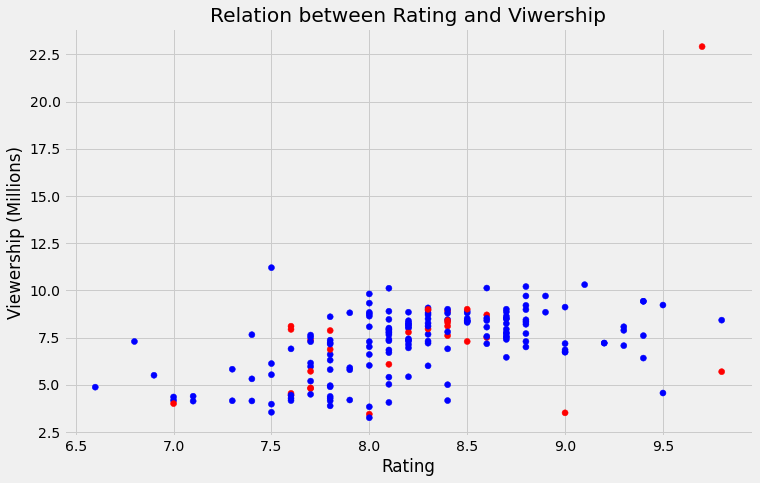

In [69]:
fig, ax = plt.subplots()

ralation_color = [GuestColor(guest, 'red', 'blue') for guest in office_df['HasGuestStars']]

ax.scatter(office_df['Ratings'], office_df['Viewership'], color = ralation_color )
ax.set_xlabel('Rating')
ax.set_ylabel('Viewership (Millions)')
ax.set_title("Relation between Rating and Viwership")

plt.show()

According to above scatter plot, 'rating' and 'viewerships' with Guest Star Appearance is not related each others

### Comparison in Appearance of Guest Star in Rating and Viewership

After we invesigating the appearance of Guest stars, we compare the difference of non guest stars and guest stars episodes<br>
We compare two data frames (guest and no-guest) with <b>Boxplot</b> in Rating and Viewers.<br>
Left Figure is 'Compare Rating' and Right Figure is 'Compare Viewership'.<br>
Median Value is red solid line <b style='color:red'>____</b> and Mean value is dotted red line <b style='color:red'>_ _ _ _</b>

count    29.000000
mean      8.196552
std       0.610318
min       7.000000
25%       7.700000
50%       8.300000
75%       8.400000
max       9.800000
Name: Ratings, dtype: float64


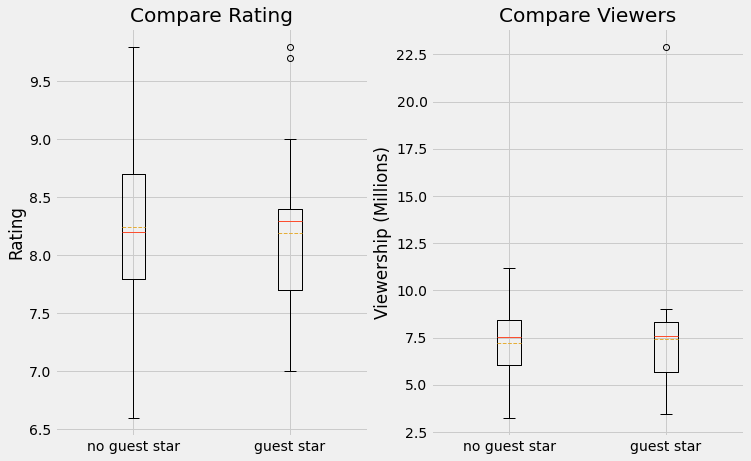

In [89]:
fig, ax = plt.subplots(1,2)

rating_bp = ax[0].boxplot([non_guest_df['Ratings'], guest_df['Ratings']],
                          showmeans = True,
                          meanline=True,
                          labels= ['no guest star', 'guest star'] )
ax[0].set_ylabel('Rating')
ax[0].set_title('Compare Rating')
print(guest_df['Ratings'].describe())

ax[1].boxplot([non_guest_df['Viewership'], guest_df['Viewership']],
              showmeans = True,
              meanline=True,
              labels= ['no guest star', 'guest star'])
ax[1].set_ylabel('Viewership (Millions)')
ax[1].set_title('Compare Viewers')

# ax[0].grid(False)
# ax[1].grid(False)
plt.show()

#ax[0].boxplot(guest_df['Ratings'])

Compare Rating,
- Meian Values are almostly equal
- Mean value of Guest Star is little higher than non Guest Star <br>
So, When there is Guest Star in Episode, the 'rating' value is increase.

Compare Viewe
 - Although Guest Star containing outliner in viewership, both mean and median vales in appearance of Guest Star are absolutely equl. So there is no difference in Viewership of each Episode